# **Clustering Analysis**
- K-means clustering implementation and validation
- Hierarchical clustering with multiple linkage methods
- Elbow method analysis and cluster number selection
- Density plot analysis and cluster overlap assessment

### Preloading necessary libraries

In [1]:
import pandas as pd # DataFrame creation

import matplotlib.pyplot as plt # Visualizations
import seaborn as sns # Visualizations

from sklearn.preprocessing import StandardScaler # Preprocessing - Scaling
from sklearn.cluster import KMeans # K-means Clustering
from sklearn.cluster import AgglomerativeClustering # Hierarchical Clustering

In [ ]:
# Reload and prepare data
path = 'https://raw.githubusercontent.com/JustGlowing/minisom/refs/heads/master/examples/democracy_index.csv'
df = pd.read_csv(path)
data_df = df.drop(columns=['democracy_index','rank','country','Unnamed: 0','category'])

# Apply scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_df)
scaled_df = pd.DataFrame(scaled_data, columns=data_df.columns)

## **K-means Clustering Analysis**
Elbow Method for Optimal k Selection

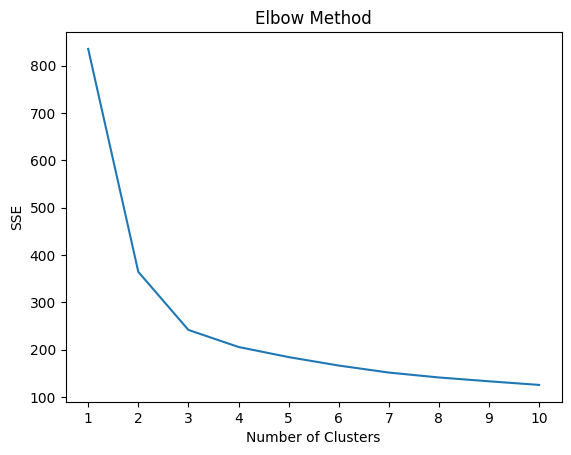

In [ ]:
# Determining the value of k

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 42,
}

# Creating empty list to store kmeans value for each cluster
sse = []

# Looping through all clusters to later visualize which value is suggested
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.title('Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

The elbow method suggests k=3-5 as viable options, though no clear optimal point emerges. We selected k=5 for practical analysis purposes. The ambiguous results highlight the need for additional validation methods such as silhouette analysis for more rigorous cluster selection in future work.Elbow Method analysis results makes it hard to notice a distinct "elbow"; however, it does fall in the range of the actual solution of 4 clusters (regimes).

#### Implementing K-means clustering

Using K=5 clusters based on elbow method results.

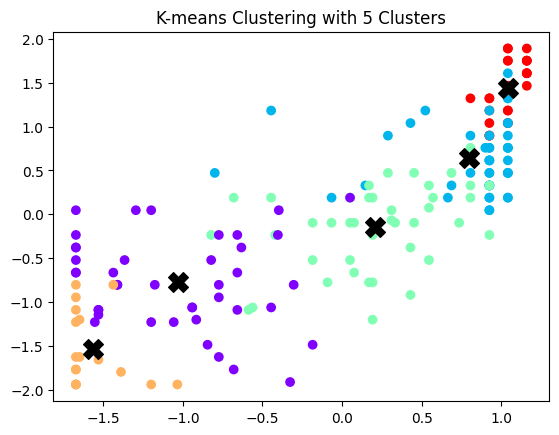

In [ ]:
# K-means clustering

# Using K-Means for clustering
kmeans = KMeans(n_clusters=5, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Plotting the clusters and their centers
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X')
plt.title("K-means Clustering with 5 Clusters")
plt.show()

## **Hierarchical Clustering Analysis**

### Hierarchical clustering using **complete** linkage method

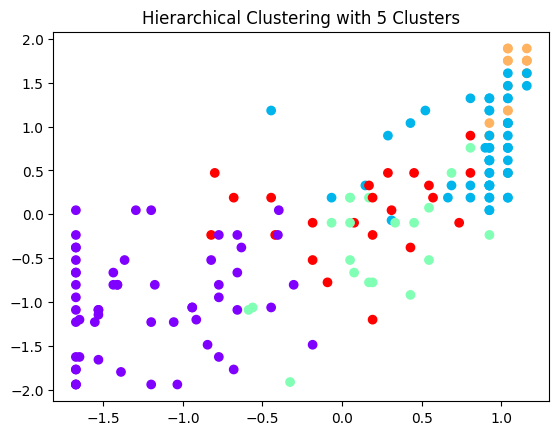

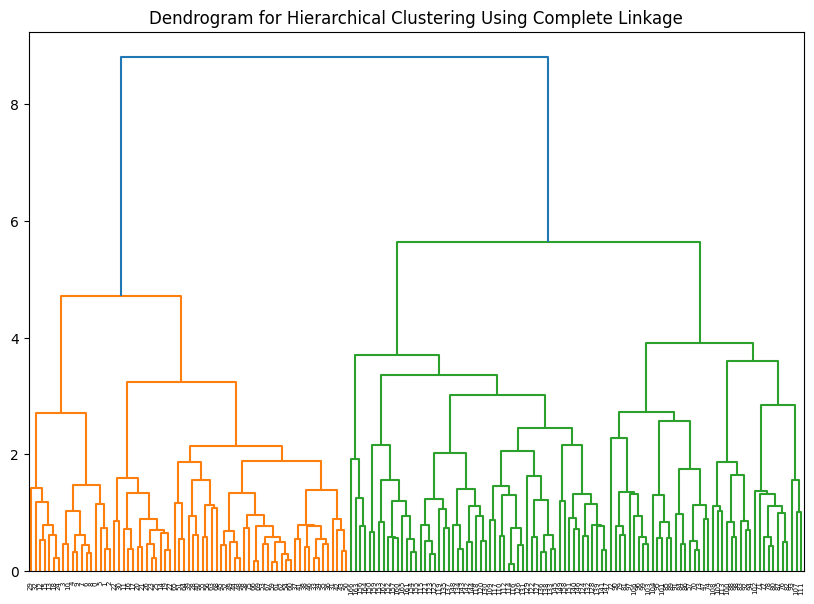

In [ ]:
# Using Agglomerative Clustering for hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='complete')
agg_clusters = agg_clustering.fit_predict(scaled_data)

# Plotting the clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=agg_clusters, cmap='rainbow')
plt.title("Hierarchical Clustering with 5 Clusters")
plt.show()

from scipy.cluster.hierarchy import dendrogram, linkage

# Generating a dendrogram
linked = linkage(scaled_data, 'complete')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top')
plt.title("Dendrogram for Hierarchical Clustering Using Complete Linkage")
plt.show()

### Hierarchical clustering using **average** linkage method

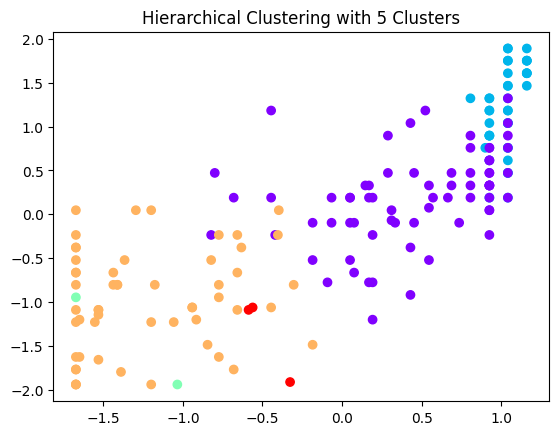

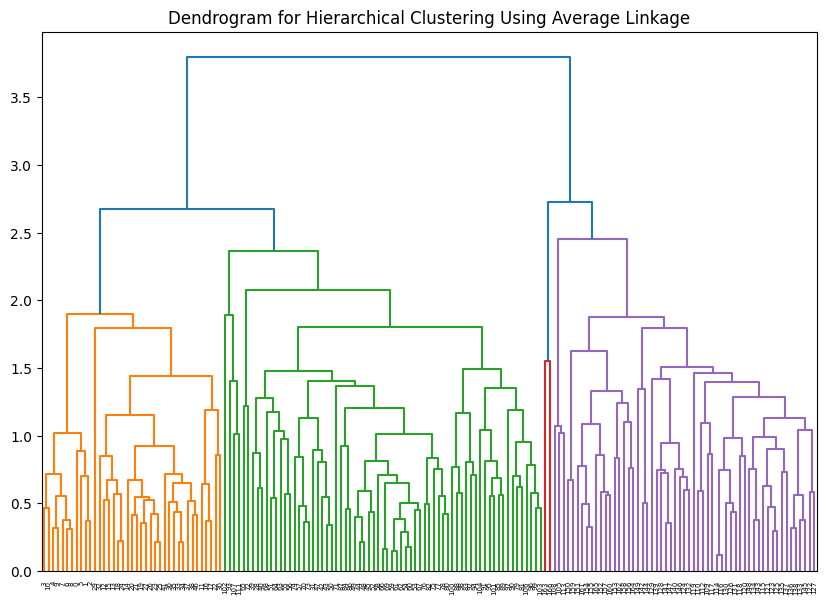

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
agg_clusters = agg_clustering.fit_predict(scaled_data)

# Plotting the clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=agg_clusters, cmap='rainbow')
plt.title("Hierarchical Clustering with 5 Clusters")
plt.show()

from scipy.cluster.hierarchy import dendrogram, linkage

# Generating a dendrogram
linked = linkage(scaled_data, 'average')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top')
plt.title("Dendrogram for Hierarchical Clustering Using Average Linkage")
plt.show()